# Introduction

We have several spreadsheets from Brian. How much is in common & how much is different between them all?

In [1]:
import pandas
from pathlib import Path
import sys
import re
from matplotlib import pyplot
import upsetplot

In [2]:
EC = str(Path("/home/diane/proj/encoded_client/").expanduser())
if EC not in sys.path:
    sys.path.append(EC)
from encoded_client import encoded

server = encoded.ENCODED('www.encodeproject.org')
server.load_netrc()

In [3]:
encode_dir = Path("~/woldlab/ENCODE").expanduser()
biosample_dir = encode_dir / 'mouse-biosamples'

In [4]:
ls $biosample_dir

altius-biosamples.xlsx*
BioSample_Accession_sheet_18_20_months_core_biobank_for_Diane_April16_2021.xlsx
BioSample_Accession_sheet_hippocampus_front_cortex_for_Diane_April16_2021.xlsx
BioSample_Accession_sheet_reserve_full_time_course_core_biobank_for_Diane_April16_2021.xlsx


In [5]:
ls $encode_dir/altius-biosamples.xlsx

ls: cannot access '/home/diane/woldlab/ENCODE/altius-biosamples.xlsx': No such file or directory


In [6]:
class ValidationException(Exception):
    pass

def depluralize(word):
    if word.endswith('s'):
        return word[:-1]
    else:
        return word

def validate_rows_from_description(table):
    for i, row in table.iterrows():
        terms = [depluralize(x) for x in row['description'].lower().split()]
        if row['model_organism_sex'] not in terms:
            raise ValidationException("mismatch sex {} {} {}".format(i, row['model_organism_sex'], row['description']))
        if "3x" in terms:
            if row['starting_amount:integer'] != 3:
                raise ValidationException("Mismatch starting amount {} {} {}".format(i, row['starting_amount:integer'], row['description']))
        else:
            dissection = [x for x in terms if x.startswith('0')]
            if len(dissection) == 0:
                continue
                #if not (pandas.isnull(row['Mouse ID:skip']) or int(row['Mouse ID:skip']) == 1):
                #    raise ValidationException('Mismatched dissection id {} {}'.format(i, row['description']))
            if len(dissection) > 1:
                raise ValidationException('Too many dissection terms {} {} {}'.format(i, dissection, row['description']))
            if pandas.isnull(row['mouse_id:skip']):
                raise ValidationException('Undefined dissection id {} {} {}'.format(i, dissection[0], row['description']))                
            if int(dissection[0]) != int(row['mouse_id:skip']):
                raise ValidationException('Mismatched dissection id {} {} {}'.format(i, dissection[0], row['description']))


In [7]:
biobank_18mo = pandas.read_excel(biosample_dir / 'BioSample_Accession_sheet_18_20_months_core_biobank_for_Diane_April16_2021.xlsx')
biobank_18mo.head()

,uuid,accession,aliases:array,lab distribution:skip,box:skip,description,strain:skip,age:skip,mouse_life_stage,model_organism_age,...,starting_amount:integer,starting_amount_units,biosample_ontology,biosample_term_name:skip,date_obtained:date,organism,donor,source,lab,award
0,2b034fe3-2593-423c-97ab-a899d0e677c5,ENCBS179OEC,NaN,Wold,box 13,B6Cast F1 DPN18-20months,B6Cast F1,18-20 months,adult,18-20,...,1,items,/biosample-types/tissue_UBERON_0002369/,Adrenals,2020-07-21,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
1,71dfe507-09c8-4776-b9fa-d16c7ae53d9c,ENCBS521BOK,NaN,Wold,box 13,B6Cast F1 DPN18-20months,B6Cast F1,18-20 months,adult,18-20,...,1,items,/biosample-types/tissue_UBERON_0002113/,Kidneys,2020-07-21,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
2,9021c3e6-4a3c-4b90-8882-fceeadce76fb,ENCBS791MFH,NaN,Wold,box 13,B6Cast F1 DPN18-20months,B6Cast F1,18-20 months,adult,18-20,...,1,items,/biosample-types/tissue_UBERON_0002037/,Cerebullum,2020-07-21,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
3,d875a623-4112-4e20-892f-46f8304b7ec5,ENCBS780VMJ,NaN,Wold,box 13,B6Cast F1 DPN18-20months,B6Cast F1,18-20 months,adult,18-20,...,1,items,/biosample-types/tissue_NTR_0000647/,R. Cortex,2020-07-21,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
4,b78da298-0df7-41f3-b80c-f494cfe2f81a,ENCBS833RXG,NaN,Wold,box 13,B6Cast F1 DPN18-20months,B6Cast F1,18-20 months,adult,18-20,...,1,items,/biosample-types/tissue_NTR_0000646/,L. Cortex,2020-07-21,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443


In [8]:
biobank_full = pandas.read_excel(biosample_dir / 'BioSample_Accession_sheet_reserve_full_time_course_core_biobank_for_Diane_April16_2021.xlsx')
validate_rows_from_description(biobank_full)
biobank_full.head()

,uuid,accession,aliases:array,lab distribution:skip,strain:skip,age:skip,sex:skip,description,mouse_id:skip,starting_amount:integer,...,model_organism_sex,biosample_ontology,biosample_term_name:skip,type:skip,date_obtained:date,organism,donor,source,lab,award
0,31f08df3-0c70-4e08-8307-057c5df9b84d,ENCBS533PEK,NaN,NaN,B6Cast F1,B6Cast F1 PND4,Female 01,B6Cast F1 PND4 Female 01,1.0,1,...,female,/biosample-types/tissue_UBERON_0002369/,Adrenals,Replicate,2019-10-30,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
1,611edab0-1d36-490b-b060-04d3d3bbc011,ENCBS487LZA,NaN,NaN,B6Cast F1,B6Cast F1 PND4,Female 01,B6Cast F1 PND4 Female 01,1.0,1,...,female,/biosample-types/tissue_UBERON_0002113/,Kidneys,Replicate,2019-10-30,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
2,0c2d8e34-1028-4ed8-94e7-1145a19af8a7,ENCBS745AXE,NaN,NaN,B6Cast F1,B6Cast F1 PND4,Female 01,B6Cast F1 PND4 Female 01,1.0,1,...,female,/biosample-types/tissue_UBERON_0002037/,Cerebullum,Replicate,2019-10-30,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
3,d5a47c0a-4239-45b2-9dcd-8928b16417b3,ENCBS716WUA,NaN,NaN,B6Cast F1,B6Cast F1 PND4,Female 01,B6Cast F1 PND4 Female 01,1.0,1,...,female,/biosample-types/tissue_NTR_0000647/,R. Cortex,Replicate,2019-10-30,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
4,d6a2a701-a38a-427f-a0ee-3813c09850a2,ENCBS887MWX,NaN,NaN,B6Cast F1,B6Cast F1 PND4,Female 01,B6Cast F1 PND4 Female 01,1.0,1,...,female,/biosample-types/tissue_NTR_0000646/,L. Cortex,Replicate,2019-10-30,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443


In [9]:
hippocampus = pandas.read_excel(biosample_dir / 'BioSample_Accession_sheet_hippocampus_front_cortex_for_Diane_April16_2021.xlsx')
validate_rows_from_description(hippocampus)
hippocampus.head()

,uuid,accession,aliases:array,lab distribution:skip,description,strain:skip,age:skip,model_organism_age,model_organism_age_units,sex:skip,...,biosample_ontology,biosample_term_name:skip,stored:skip,date_obtained:date,comments:skip,organism,donor,source,lab,award
0,6c903705-c1db-4292-981c-5f888d265ccc,ENCBS773DNE,NaN,NaN,B6Cast F1 PND10 3x female Frontal Cortex,B6Cast F1,PND10,10,day,3x female,...,/biosample-types/tissue_UBERON_0001870/,Frontal Cortex,-80,2020-10-21,NaN,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
1,6e2ef789-cbbb-4e68-9707-d541734516cf,ENCBS130AEV,NaN,NaN,B6Cast F1 PND10 3x female Frontal Cortex,B6Cast F1,PND10,10,day,3x female,...,/biosample-types/tissue_UBERON_0001870/,Frontal Cortex,-80,2020-10-21,NaN,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
2,1536ad32-276e-4943-be54-cf48f5a41699,ENCBS030EDW,NaN,NaN,B6Cast F1 PND10 3x male Frontal Cortex,B6Cast F1,PND10,10,day,3x male,...,/biosample-types/tissue_UBERON_0001870/,Frontal Cortex,-80,2020-10-21,NaN,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
3,88a62223-5b6c-4452-88d4-2440f5792681,ENCBS110FYQ,NaN,NaN,B6Cast F1 PND10 3x male Frontal Cortex,B6Cast F1,PND10,10,day,3x male,...,/biosample-types/tissue_UBERON_0001870/,Frontal Cortex,-80,2020-10-21,NaN,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
4,NaN,missing,NaN,NaN,B6Cast F1 PND10 3x male Frontal Cortex,B6Cast F1,PND10,10,day,3x male,...,/biosample-types/tissue_UBERON_0001870/,Frontal Cortex,-80,2020-10-21,missing,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443


In [10]:
altius_suffix = re.compile("( for Altius Stam( (core)|(biobank))?)|( biobank)|( for Wold core)|( for Wold)")

current = pandas.read_excel(
    biosample_dir / 'altius-biosamples.xlsx',
    converters={
        'description': lambda x: altius_suffix.sub('', x),
    }
)
validate_rows_from_description(current)
current.head()

,uuid,accession,aliases:array,biosample_ontology,biosample_term_name:skip,description,mouse_id:skip,model_organism_sex,starting_amount:integer,starting_amount_units,date_obtained:date,model_organism_age,model_organism_age_units,model_organism_sex.1,organism,donor,source,lab,award
0,080b20c5-cff7-4e8b-8f46-97affd5c40f6,ENCBS110XTZ,NaN,/biosample-types/tissue_UBERON_0002369/,Adrenals,B6Cast F1 PND4 3x Males 05 adrenal gland,5,male,3.0,items,2020-01-23,4.0,day,male,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
1,ed68f3e1-608c-4fc2-aa18-77fc9c188bb7,ENCBS209QZR,NaN,/biosample-types/tissue_UBERON_0002113/,Kidneys,B6Cast F1 PND4 3x Males 05 kidney,5,male,3.0,items,2020-01-23,4.0,day,male,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
2,38c2d6c1-25a1-4212-8c39-0f6cdb758876,ENCBS561TMO,NaN,/biosample-types/tissue_UBERON_0002037/,Cerebullum,B6Cast F1 PND4 3x Males 05 cerebellum,5,male,3.0,items,2020-01-23,4.0,day,male,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
3,9e6f7260-7211-44ca-9896-177f4d0e979f,ENCBS958KUJ,NaN,/biosample-types/tissue_UBERON_0001388/,Gastroc,B6Cast F1 PND4 3x Males 05 gastrocnemius,5,male,3.0,items,2020-01-23,4.0,day,male,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443
4,cce20696-7d4a-4dbb-9cee-d45397e1e105,ENCBS777ZHB,NaN,/biosample-types/tissue_UBERON_0002369/,Adrenals,B6Cast F1 PND4 3x Males 06 adrenal gland,6,male,3.0,items,2020-01-23,4.0,day,male,/organisms/mouse/,/mouse-donors/ENCDO509HIY/,/sources/jackson-labs/,barbara-wold,UM1HG009443


In [27]:
row = current.iloc[572]
terms = [depluralize(x) for x in row['description'].lower().split()]
print(terms)
print(terms.model_organism_sex)

uuid                                    eafeb508-a5a4-4470-9b85-5e409cf6d793
accession                                                        ENCBS861KNF
aliases:array                                                            NaN
biosample_ontology                   /biosample-types/tissue_UBERON_0001388/
biosample_term_name:skip                                       gastrocnemius
description                 B6Cast F1 PND 18-20 months Male 04 gastrocnemius
mouse_id:skip                                                              4
model_organism_sex                                                      male
starting_amount:integer                                                    1
starting_amount_units                                                  items
date_obtained:date                                                       NaT
model_organism_age                                                       NaN
model_organism_age_units                                                 NaN

In [11]:
def find_known_tissues(terms):
    known_tissues = [
        ['adrenal', 'gland'],
        ['cerebellum'],
        ['cerebral', 'cortex'],
        ['gastrocnemius'],
        ['heart'],
        ['kidney'],
        ['lung'],
        ['ovary'],
        ['spleen'],
        ['testis'],
        ['thymus'],
        ['urinary', 'bladder'],
    ]
    for known in known_tissues:
        known_match = True
        for term_word, known_word in zip(terms[-len(known):], known):
            if term_word != known_word:
                known_match = False
                break
                
        if known_match:
            return known

def parse_encode_description(description):
    terms = description.split()
    strain = terms[0:2]
    age = terms[2]
    

    tissue = find_known_tissues(terms)
    if tissue is None:
        mouse = None
        print("Unrecognized:", description)
    else:
        mouse = terms[3:-len(tissue)]
        
    return (' '.join(strain), age, ' '.join(mouse), ' '.join(tissue))
        
for d in current['description']:
    _ = parse_encode_description(d)

In [12]:
compare = [
    #current['description'].apply(parse_encode_description),
    current[['model_organism_age', 'model_organism_age_units', 'model_organism_sex', 'biosample_term_name:skip']],
    [(row['model_organism_age'], row['model_organism_age_units'], row['model_organism_sex'], row['biosample_term_name:skip']) for i, row in hippocampus.iterrows()]
]

In [13]:
#compare

In [14]:
column_content = upsetplot.from_contents({
    'biobank_full': biobank_full.columns,
    'biobank_18mo': biobank_18mo.columns,
    'hippocampus': hippocampus.columns,
    'current': current.columns,
})

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

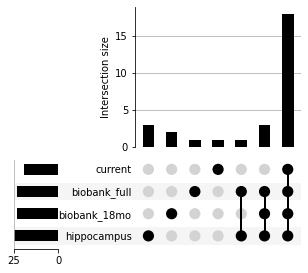

In [15]:
upsetplot.plot(column_content)

In [16]:
column_content

id
biobank_full biobank_18mo hippocampus current                          
True         True         True        True                         uuid
                                      True                    accession
                                      True                aliases:array
                                      False       lab distribution:skip
                                      False                 strain:skip
                                      False                    age:skip
             False        True        False                    sex:skip
             True         True        True                  description
                                      True                mouse_id:skip
                                      True      starting_amount:integer
                                      True        starting_amount_units
                                      True           model_organism_age
                                      True     model_organism_age_units
                                      True           model_organism_sex
                                      True           biosample_ontology
                                      True     biosample_term_name:skip
             False        False       False                   type:skip
             True         True        True           date_obtained:date
                                      True                     organism
                                      True                        donor
                                      True                       source
                                      True                          lab
                                      True                        award
False        True         False       False                    box:skip
                                      False            mouse_life_stage
             False        True        False              Born Date:skip
                                      False                 stored:skip
                                      False               comments:skip
                          False       True         model_organism_sex.1

In [17]:
set(biobank_18mo.columns).difference(biobank_full.columns)

{'box:skip', 'mouse_life_stage'}

In [18]:
ontology_map = {
    'adrenals': '/biosample-types/tissue_UBERON_0002369/',
    'adrenal glands': '/biosample-types/tissue_UBERON_0002369/',
    'left adrenal': '/biosample-types/tissue_UBERON_0001234/',
    'l. adrenal': '/biosample-types/tissue_UBERON_0001234/',
    'right adrenal': '/biosample-types/tissue_UBERON_0001233/',
    'r. adrenal': '/biosample-types/tissue_UBERON_0001233/',
    'bladder': '/biosample-types/tissue_UBERON_0001255/',
    'cerebullum': '/biosample-types/tissue_UBERON_0002037/',
    'frontal cortex': "/biosample-types/tissue_UBERON_0001870/",
    'left cortex': '/biosample-types/tissue_NTR_0000646/',
    'l. cortex': '/biosample-types/tissue_NTR_0000646/',
    'right cortex': '/biosample-types/tissue_NTR_0000647/',
    'r. cortex': '/biosample-types/tissue_NTR_0000647/',
    'heart': '/biosample-types/tissue_UBERON_0000948/',
    'hippocampus': '/biosample-types/tissue_UBERON_0002305/',
    'kidneys': '/biosample-types/tissue_UBERON_0002113/',
    'left kidney': '/biosample-types/tissue_UBERON_0004538/',
    'l. kidney': '/biosample-types/tissue_UBERON_0004538/',
    'right kidney': '/biosample-types/tissue_UBERON_0004539/',
    'r. kidney': '/biosample-types/tissue_UBERON_0004539/',
    'lungs': '/biosample-types/tissue_UBERON_0002048/',
    'ovaries': '/biosample-types/tissue_UBERON_0000992/',
    'spleen': '/biosample-types/tissue_UBERON_0002106/',
    'testes': '/biosample-types/tissue_UBERON_0000473/',
    'thymus': '/biosample-types/tissue_UBERON_0002370',
    'gastroc': '/biosample-types/tissue_UBERON_0001388/',
    'gastrocnemius': '/biosample-types/tissue_UBERON_0001388/',
#Right adrenal gland cortex: https://www.encodeproject.org/biosample-types/tissue_UBERON_0035827/
#Left adrenal gland cortex: https://www.encodeproject.org/biosample-types/tissue_UBERON_0035825/
#Right adrenal gland: https://www.encodeproject.org/biosample-types/tissue_UBERON_0001233/
#Left adrenal gland: https://www.encodeproject.org/biosample-types/tissue_UBERON_0001234/    
}

def lookup_biosample_names(server, ontology_map):
    results = []
    for abbreviation in ontology_map:
        biosample_ontology_id = ontology_map[abbreviation]
        if biosample_ontology_id is None:
            biosample_ontology = {'term_name': 'Undefined'}
        else:
            biosample_ontology = server.get_json(biosample_ontology_id)
        results.append({
            'name': abbreviation, 
            'term_name': biosample_ontology['term_name'], 
            '@id': biosample_ontology_id})

    return pandas.DataFrame(results)

def biosample_lookup(term_name):
    if not pandas.isnull(term_name):
        return ontology_map.get(term_name.strip().lower(), None)


In [19]:
lookup_biosample_names(server, ontology_map)

,name,term_name,@id
0,adrenals,adrenal gland,/biosample-types/tissue_UBERON_0002369/
1,adrenal glands,adrenal gland,/biosample-types/tissue_UBERON_0002369/
2,left adrenal,left adrenal gland,/biosample-types/tissue_UBERON_0001234/
3,l. adrenal,left adrenal gland,/biosample-types/tissue_UBERON_0001234/
4,right adrenal,right adrenal gland,/biosample-types/tissue_UBERON_0001233/
5,r. adrenal,right adrenal gland,/biosample-types/tissue_UBERON_0001233/
6,bladder,urinary bladder,/biosample-types/tissue_UBERON_0001255/
7,cerebullum,cerebellum,/biosample-types/tissue_UBERON_0002037/
8,frontal cortex,frontal cortex,/biosample-types/tissue_UBERON_0001870/
9,left cortex,left cerebral cortex,/biosample-types/tissue_NTR_0000646/


In [20]:
biobank_full['biosample_term_name:skip']

0        Adrenals
1         Kidneys
2      Cerebullum
3       R. Cortex
4       L. Cortex
          ...    
331         Heart
332       Ovaries
333        Thymus
334        Spleen
335       Gastroc
Name: biosample_term_name:skip, Length: 336, dtype: object

In [21]:
#biobank_full['biosample_term_name:skip'].apply(biosample_lookup).to_csv('/dev/shm/ontology.csv', index=False)
biobank_18mo['biosample_term_name:skip'].apply(biosample_lookup).to_csv('/dev/shm/ontology.csv', index=False)
#hippocampus['biosample_term_name:skip'].apply(biosample_lookup).to_csv('/dev/shm/ontology.csv', index=False)

The order of the biosamples in the submission spreadsheet Brian gave me is different from the biosample submission sheet he gave me.

This block is to go from the hippocampus dataset to the submission sheet.

In [22]:
stranded_23204_book = pandas.ExcelFile(Path('~/woldlab/ENCODE/stranded-23204-23231-mouse-hippocampus.xlsx').expanduser())
stranded_23204_biosample = stranded_23204_book.parse('Biosample')

In [23]:
hippo_obtained = {}
for i, row in hippocampus.iterrows():
    key = (row['biosample_term_name:skip'].strip().lower(), row['age:skip'].strip(), row['sex:skip'].strip(), str(row['mouse_id:skip']).strip())
    hippo_obtained[key] = row['date_obtained:date']

for i, row in stranded_23204_biosample.iterrows():
    terms = row['description'].split('_')
    key = (terms[0].lower(), terms[2], terms[3], terms[4])
    if key in hippo_obtained:
        print(hippo_obtained[key].date())
    else:
        print(None)
    

2020-10-21
2021-01-05
2020-10-21
2021-01-26
2020-12-18
2021-01-08
2021-01-08
2021-03-02
2020-11-30
2020-11-30
2020-12-17
2020-12-17
2020-11-19
2021-01-19
2020-11-19
2020-12-01
None
None
None
None
None
None
None
None
2020-12-01
None
None
None


Now that I submitted the biosamples from the biosample submission sheet, I need to update the biosamples in the submission sheet.

In [24]:
stranded_23204_book = pandas.ExcelFile(Path('~/woldlab/ENCODE/stranded-23204-23231-mouse-hippocampus.xlsx').expanduser())

hippo_accession = {}
for i, row in stranded_23204_biosample.iterrows():
    terms = row['description'].split('_')
    key = (terms[0].lower(), terms[2], terms[3], terms[4])
    hippo_accession.setdefault(key, []).append((row['uuid'], row['accession']))
    

rows = []
for i, row in hippocampus.iterrows():
    key = (row['biosample_term_name:skip'].strip().lower(), row['age:skip'].strip(), row['sex:skip'].strip(), str(row['mouse_id:skip']).strip())
    rows.append(hippo_accession.get(key, [(None,None)])[0])

df = pandas.DataFrame(rows, columns=['uuid', 'accession'])
df

,uuid,accession
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
169,None,None
170,None,None
171,None,None
172,None,None


In [25]:
df.to_excel('/dev/shm/biosamples.xlsx', index=False)

/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:358: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if token is '':
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:2437: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if options['min_type'] is 'min' and options['min_value'] == 0:
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:2440: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if options['max_type'] is 'max' and options['max_value'] == 0:
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:4999: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if props[i]['type'] is 'number':
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:6827: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if data_bar['bar_axis_position'] is not 'none':
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:6862: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if data_bar['bar_direction'] is 'left':
/usr/lib/python3/dist-pack